In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df = pd.read_csv("HR_comma_sep.csv")

In [121]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [122]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [123]:
# No missing values then we can move further

In [124]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [125]:
#Impact of salary on employees

<AxesSubplot:xlabel='salary'>

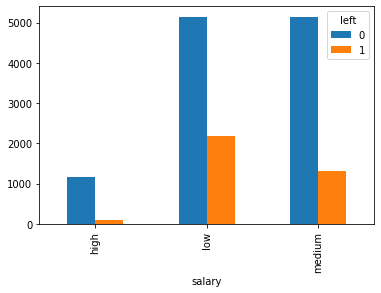

In [126]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [127]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [128]:
df1 = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]

In [129]:
df1.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [130]:
dummies = pd.get_dummies(df1.salary,drop_first=True)

In [131]:
merged = pd.concat([df1,dummies],axis=1)

In [132]:
merged

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,low,medium
0,0.38,157,0,low,1,0
1,0.80,262,0,medium,0,1
2,0.11,272,0,medium,0,1
3,0.72,223,0,low,1,0
4,0.37,159,0,low,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,low,1,0
14995,0.37,160,0,low,1,0
14996,0.37,143,0,low,1,0
14997,0.11,280,0,low,1,0


In [133]:
merged.drop('salary',axis=1,inplace=True)

In [134]:
merged

,satisfaction_level,average_montly_hours,promotion_last_5years,low,medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0
...,...,...,...,...,...
14994,0.40,151,0,1,0
14995,0.37,160,0,1,0
14996,0.37,143,0,1,0
14997,0.11,280,0,1,0


In [135]:
x = merged
y = df.left

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
SS = StandardScaler()

In [140]:
x_train = SS.fit_transform(x_train)

In [141]:
x_test = SS.fit_transform(x_test)

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
LR = LogisticRegression()

In [144]:
LR.fit(x_train,y_train)

LogisticRegression()

In [145]:
LR.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [146]:
LR.score(x_test,y_test)

0.777

In [147]:
#It's not good accuracy